In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the Santander customer satisfaction dataset from Kaggle

X_train = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\train.csv", nrows=35000)

X_test = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\test.csv", nrows=15000)

In [4]:
# drop TARGET label from X_train

X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [5]:
# check shape of training and test sets

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

# Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [6]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [7]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

319

In [8]:
# alternate way of finding non-constant features
len(X_train.columns[sel.get_support()])

319

In [9]:
# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

We can see that there are 51 columns / variables that are constant. This means that 51 variables show the same value, just one value, for all the observations of the training set.

We then use the transform function to reduce the training and testing sets.

In [10]:
# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [11]:
# check the shape of training and test set

X_train.shape, X_test.shape

((35000, 319), (15000, 319))

# Remove quasi-constant features 

Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So we should be careful when removing these type of features. Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

To identify quasi-constant features, we can once again use the VarianceThreshold function from sklearn.

Here I will demonstrate how to identify quasi-constant features using the Santander Customer Satisfaction dataset.

In [12]:
# import the Santander customer satisfaction dataset from Kaggle

X_train = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\train.csv", nrows=35000)

X_test = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\test.csv", nrows=15000)

In [13]:
# drop TARGET label from X_train

X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [14]:
# check shape of training and test sets

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

# Removing quasi-constant features

# Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

Here, I will change the default threshold to remove almost / quasi-constant features.

In [15]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [16]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

263

In [17]:
# alternative way of doing the above operation:
len(X_train.columns[sel.get_support()])

263

In [18]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

We can see that 107 columns / variables are almost constant. This means that 107 variables show predominantly one value for ~99% the observations of the training set.

In [19]:
# percentage of observations showing each of the different values
X_train['ind_var31'].value_counts() / float(len(X_train))


0    0.996286
1    0.003714
Name: ind_var31, dtype: float64

In [20]:
# we can then remove the features from training and test set
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [21]:
# check the shape of training and test set
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

By removing constant and quasi-constant features, we reduced the feature space from 370 to 263. We can see that more than 100 features were removed from the present dataset

# Univariate selection methods 

There are 4 methods that fall under this category :-

1.SelectKBest

2.SelectPercentile

3.SelectFpr, SelectFdr, or family wise error SelectFwe

4.GenericUnivariateSelection

# SelectKBest 

In [22]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [23]:
# select the two best features
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

Thus, we have selected the two best features from the iris dataset.

# SelectPercentile

Select features according to a percentile of the highest scores.

In [24]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [25]:
# now select features based on top 10 percentile
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

We can see that only 7 features lie on the top 10 percentile and hence we select them accordingly.

# Fisher Score (chi-square implementation) 

It is the chi-square implementation in scikit-learn. It computes chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [26]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
# Load Data
# load iris data
iris = load_iris()

# create features and target
X = iris.data
y = iris.target

# convert to categorical data by converting data to integers
X = X.astype(int)

In [28]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [29]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


We can see that the above code helps us to select the 2 best features based on Fisher score.

# ANOVA F-value For Feature Selection

Compute the ANOVA F-value for the provided sample.

If the features are categorical, we will calculate a chi-square statistic between each feature and the target vector. However, if the features are quantitative, we will compute the ANOVA F-value between each feature and the target vector.

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [30]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [31]:
# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [32]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [33]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


We can see that the above code helps us to select the 2 best features based on ANOVA F-Value.

# Correlation-Matrix with Heatmap 

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

Good variables are highly correlated with the target.

Correlated predictor variables provide redundant information.

Variables should be correlated with the target but uncorrelated among themselves.

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis:

 "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each     other".

In this section, I will demonstrate how to select features based on correlation between two features. We can find features that are correlated with each other. By identifying these features, we can then decide which features we want to keep, and which ones we want to remove.

Using Pearson correlation our returned coefficient values will vary between -1 and 1.

If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [34]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [35]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [36]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


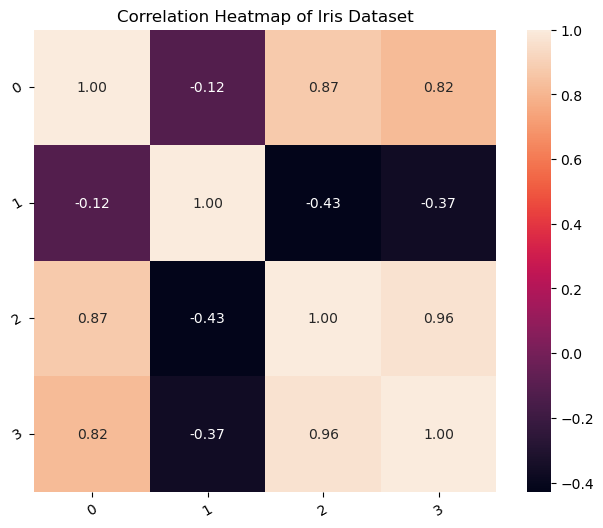

In [37]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    

In [38]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper


,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [39]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [40]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


# Wrapper Methods 

n wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are

Forward selection,

Backward elimination,

Exhaustive feature selection,

Recursive feature elimination.

Recursive feature elimination with cross-validation

# Forward Selection

In [41]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [42]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [43]:
#load dataset
data = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\train.2.csv")
data.shape

(1460, 81)

In [44]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [45]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [46]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [47]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 34), (438, 34))

In [48]:
X_train.fillna(0, inplace=True)

In [49]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.6s finished

[2024-04-16 23:33:15] Features: 1/10 -- score: 0.6674319898715358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   13.7s finished

[2024-04-16 23:33:28] Features: 2/10 -- score: 0.7223040147837024[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   14.5s finished

[2024-04-16 23:33:43] Features: 3/10 -- score: 0.7470257839832892[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [50]:
sfs1.k_feature_idx_

(4, 5, 6, 9, 14, 16, 17, 19, 22, 24)

In [51]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageCars'],
      dtype='object')

We can see that forward feature selection results in the above columns being selected from all the given columns.

# Backward Elimination

In [ ]:
# step backward feature elimination

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  2.6min finished

[2024-04-16 23:39:16] Features: 33/10 -- score: 0.8550565333880984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  2.5min finished

[2024-04-16 23:41:45] Features: 32/10 -- score: 0.8595027111825458[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  2.3min finished

[2024-04-16 23:44:05] Features: 31/10 -- score: 0.8571352637068651[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
sfs1.k_feature_idx_

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

# LASSO Regression

In [ ]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset
data = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\train.2.csv")
data.shape

In [ ]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

In [ ]:
sel_.get_support()

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

# Random Forest Importance

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

Random forests consist of 4-12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived by how "pure" each of the buckets is.

For classification, the measure of impurity is either the Gini impurity or the information gain/entropy. For regression the measure of impurity is variance. Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

Please see my kernel, Random Forest Classifier + Feature Importance - Section 13. Find important features with Random Forest model to know how to find important features using the random forest model.

I will demonstrate this process using the mushroom classification dataset as follows:-

In [ ]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load dataset
df = pd.read_csv(r"C:\Users\snega\Desktop\python\BIG DATA\Feature selection\mushrooms.csv")

In [ ]:
# Declare feature vector and target variable
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
# Encode categorical variables
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

In [ ]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

In [ ]:
# predict on the test set
y_pred = clf.predict(X_test)

# Feature Importance

Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importance of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it’s predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model.

In [ ]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

Now we know which features are most important in the Random Forest model, we can train our model just using these features.